In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np

In [4]:
p1_gen = pd.read_csv('../../data/p1_gen_dtindex.csv', index_col=0, parse_dates=True)
p1_gen.head()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [5]:
# let's go ahead and import the temp sensor

p1_wthr = pd.read_csv('../../data/Plant_1_Weather_Sensor_Data.csv', index_col=0, parse_dates=True)
p1_wthr.head()

,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,,,
2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


21.149609333333334 30.0071574
22.1761332 28.22232285714286
21.424306066666666 29.107385266666668
21.348014399999997 31.52517981818181


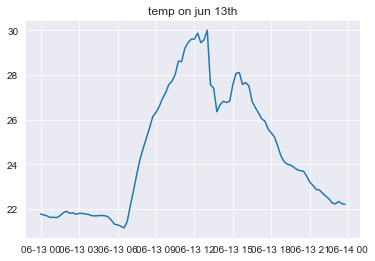

In [25]:
# Trying to match historical weather data to the plants based on weather:

jun_13_temp = p1_wthr[(p1_wthr.index.month == 6) & (p1_wthr.index.day == 13)]['AMBIENT_TEMPERATURE']
jun_14_temp = p1_wthr[(p1_wthr.index.month == 6) & (p1_wthr.index.day == 14)]['AMBIENT_TEMPERATURE']
jun_15_temp = p1_wthr[(p1_wthr.index.month == 6) & (p1_wthr.index.day == 15)]['AMBIENT_TEMPERATURE']
may_20_temp = p1_wthr[(p1_wthr.index.month == 5) & (p1_wthr.index.day == 20)]['AMBIENT_TEMPERATURE']

print(jun_13_temp.min(), jun_13_temp.max())
print(jun_14_temp.min(), jun_14_temp.max())
print(jun_15_temp.min(), jun_15_temp.max())
print(may_20_temp.min(), may_20_temp.max())

plt.plot(jun_13_temp)
plt.title('temp on jun 13th');

# looks like plant 1 is near Nashik, India, since the weather in this given data matches closest to the historical data from Nashik.

---

# DC to AC (losses)

In [7]:
losses=p1_gen.copy()
losses['day']=losses.index.date
losses

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,day
DATE_TIME,,,,,,,
2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,2020-05-15
2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,2020-05-15
2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,2020-05-15
2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,2020-05-15
2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,2020-05-15
...,...,...,...,...,...,...,...
2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,2020-06-17
2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,2020-06-17
2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,2020-06-17


In [8]:
losses=losses.groupby('day').sum().drop('PLANT_ID',axis=1)
losses

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
day,,,,
2020-05-15,5.627239e+06,550830.959402,5.053591e+06,1.339679e+10
2020-05-16,5.806138e+06,568359.821428,6.699905e+06,1.327337e+10
2020-05-17,6.759595e+06,660975.389285,7.804065e+06,1.450777e+10
2020-05-18,4.812549e+06,470969.708929,5.130290e+06,1.452094e+10
2020-05-19,5.437955e+06,532250.491070,5.896321e+06,1.370740e+10
2020-05-20,5.375586e+06,525084.567381,5.612536e+06,1.151763e+10
2020-05-21,6.781068e+06,662742.449405,6.627303e+06,9.446312e+09
2020-05-22,6.420685e+06,627830.107975,5.555931e+06,1.398968e+10
2020-05-23,7.630217e+06,745884.287974,8.468993e+06,1.353601e+10


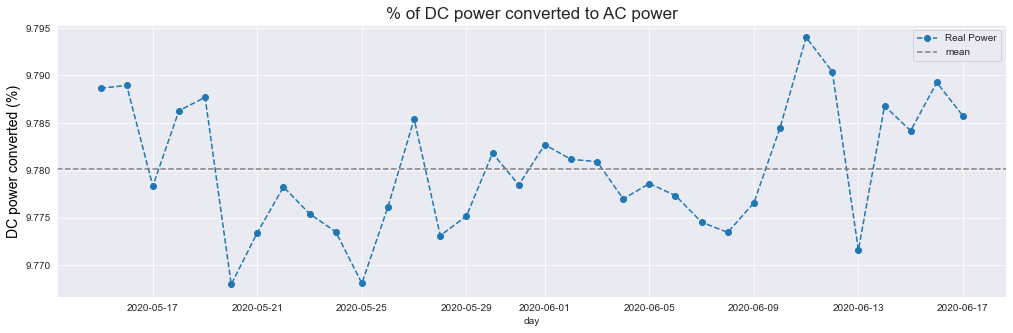

In [21]:
losses['losses']=losses['AC_POWER']/losses['DC_POWER']*100

losses['losses'].plot(style='o--',figsize=(17,5),label='Real Power')

plt.title('% of DC power converted to AC power',size=17)
plt.ylabel('DC power converted (%)',fontsize=14,color='black')
plt.axhline(losses['losses'].mean(),linestyle='--',color='gray',label='mean')
plt.legend()
plt.show()

---

# Inverter Performance

### Performance: % of DC converted to AC

In [23]:
dc_to_ac = p1_gen.copy()
dc_to_ac = dc_to_ac.groupby('SOURCE_KEY').sum().drop(['DAILY_YIELD', 'TOTAL_YIELD', 'PLANT_ID'], axis=1)
dc_to_ac['Conversion_Rate'] = dc_to_ac.AC_POWER / dc_to_ac.DC_POWER
dc_to_ac

,DC_POWER,AC_POWER,Conversion_Rate
SOURCE_KEY,,,
1BY6WEcLGh8j5v7,9.063716e+06,886665.326069,0.097826
1IF53ai7Xc0U56Y,1.006294e+07,984007.153452,0.097785
3PZuoBAID5Wc2HD,1.004313e+07,982068.208928,0.097785
7JYdWkrLSPkdwr4,9.815350e+06,959906.307338,0.097796
McdE0feGgRqW7Ca,1.003212e+07,981080.708217,0.097794
VHMLBKoKgIrUVDU,1.005725e+07,983449.000642,0.097785
WRmjgnKYAwPKWDb,9.838489e+06,962138.298813,0.097793
YxYtjZvoooNbGkE,9.869145e+06,965127.756186,0.097792
ZnxXDlPa8U1GXgE,9.997405e+06,977644.316190,0.097790


In [24]:
dc_to_ac.sort_values('Conversion_Rate')

,DC_POWER,AC_POWER,Conversion_Rate
SOURCE_KEY,,,
adLQvlD726eNBSB,1.019778e+07,997125.156663,0.097779
VHMLBKoKgIrUVDU,1.005725e+07,983449.000642,0.097785
3PZuoBAID5Wc2HD,1.004313e+07,982068.208928,0.097785
1IF53ai7Xc0U56Y,1.006294e+07,984007.153452,0.097785
iCRJl6heRkivqQ3,9.987733e+06,976688.499523,0.097789
zVJPv84UY57bAof,9.956927e+06,973677.901192,0.097789
uHbuxQJl8lW7ozc,9.985363e+06,976462.011390,0.097789
ZnxXDlPa8U1GXgE,9.997405e+06,977644.316190,0.097790
wCURE6d3bPkepu2,9.911622e+06,969260.200356,0.097790


In [10]:
dc_gen = p1_gen.copy()
dc_gen['time']=dc_gen.index.time
dc_gen

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,time
DATE_TIME,,,,,,,
2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,00:00:00
2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,00:00:00
2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,00:00:00
2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,00:00:00
2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,00:00:00
...,...,...,...,...,...,...,...
2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,23:45:00
2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,23:45:00
2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,23:45:00


In [12]:
dc_gen=dc_gen.groupby(['time','SOURCE_KEY'])['DC_POWER'].mean()
dc_gen

time      SOURCE_KEY     
00:00:00  1BY6WEcLGh8j5v7    0.0
          1IF53ai7Xc0U56Y    0.0
          3PZuoBAID5Wc2HD    0.0
          7JYdWkrLSPkdwr4    0.0
          McdE0feGgRqW7Ca    0.0
                            ... 
23:45:00  uHbuxQJl8lW7ozc    0.0
          wCURE6d3bPkepu2    0.0
          z9Y9gH1T5YWrNuG    0.0
          zBIq5rxdHJRwDNY    0.0
          zVJPv84UY57bAof    0.0
Name: DC_POWER, Length: 2112, dtype: float64

In [13]:
dc_gen=dc_gen.unstack()
dc_gen

SOURCE_KEY,1BY6WEcLGh8j5v7,1IF53ai7Xc0U56Y,3PZuoBAID5Wc2HD,7JYdWkrLSPkdwr4,McdE0feGgRqW7Ca,VHMLBKoKgIrUVDU,WRmjgnKYAwPKWDb,YxYtjZvoooNbGkE,ZnxXDlPa8U1GXgE,ZoEaEvLYb1n2sOq,...,iCRJl6heRkivqQ3,ih0vzX44oOqAx2f,pkci93gMrogZuBj,rGa61gmuvPhdLxV,sjndEbLyjtCKgGv,uHbuxQJl8lW7ozc,wCURE6d3bPkepu2,z9Y9gH1T5YWrNuG,zBIq5rxdHJRwDNY,zVJPv84UY57bAof
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


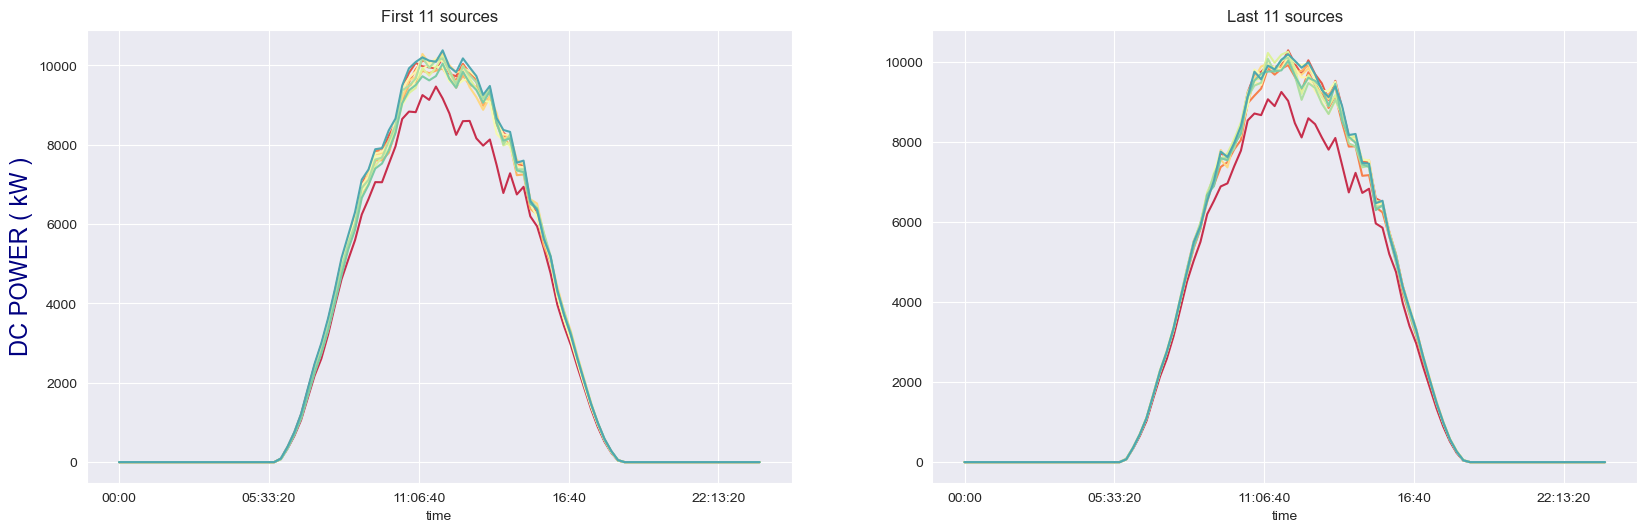

In [29]:
cmap = sns.color_palette("Spectral", n_colors=12)
cmap

fig,ax=plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,6))
dc_gen.iloc[:, 0:11].plot(ax=ax[0],color=cmap)
dc_gen.iloc[:, 11:22].plot(ax=ax[1],color=cmap)

ax[0].set_title('First 11 sources')
ax[0].set_ylabel('DC POWER ( kW )',fontsize=17,color='navy')
ax[1].set_title('Last 11 sources')
ax[0].get_legend().remove()
ax[1].get_legend().remove()
plt.show()

# LEGEND NOTE: the source key is just confusing to the audience. It's jibberish. so don't put it in, just point out how this inverter is under performing, and take it from there.

Here we can see that two inverters are underperforming compared to the rest: 1BY6WEcLGh8j5v7 & bvBOhCH3iADSQry

In [19]:
mal_1 = '1BY6WEcLGh8j5v7' 
mal_2 = 'bvBOhCH3iADSQry'

mal_1_df = p1_gen.copy()
mal_1_df

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...
2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0


In [20]:
mal_1_df = mal_1_df[mal_1_df.SOURCE_KEY == mal_1]
mal_1_df

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
2020-05-15 00:15:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
2020-05-15 00:30:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
2020-05-15 00:45:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
2020-05-15 01:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
...,...,...,...,...,...,...
2020-06-17 22:45:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0
2020-06-17 23:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0
2020-06-17 23:15:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0
